In [1]:
import os
import sys
import traceback

import main_fte
from py_utils import data_ops
import evaluate_fte
from lib import app
from py_utils import log

%load_ext autoreload
%autoreload 2

%matplotlib inline

# root_dir = os.path.join("..", "data")
root_dir = os.path.join("/Users/zico/OneDrive - University of Cape Town/CheetahReconstructionResults/cheetah_videos")
# If you are running the code remotely on the Linux i9.
# root_dir = os.path.join("/","data", "dlc", "to_analyse", "cheetah_videos")
logger = log.logger("main")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# Generate the pose functions if this has not been done before (note this should only be performed once). It will be saved in the root_dir.
functions = main_fte.create_pose_functions(root_dir)

In [2]:
# Configurations for the optimisation.
# Test files: 2017_08_29/top/jules/run1_1 (10, 110, 1), 2017_09_02/top/phantom/run1_3 (51, 130, 4)
# 2017_09_02/top/jules/run1 (22, 100, 1), 2017_08_29/top/phantom/run1_1 (20, 170, 1)
data_path = os.path.join("2017_08_29", "top", "jules", "run1_1")
start_frame, end_frame, cam_idx = (10, 110, 1)
dlc_thresh = 0.5

2021-10-18T15:20:22.476 | INFO | main_fte: Prepare data - Start
2021-10-18T15:20:23.440 | INFO | main_fte: Load H5 2D DLC prediction data
2021-10-18T15:20:24.045 | INFO | main_fte: Estimate the initial trajectory
2021-10-18T15:20:24.330 | INFO | main_fte: Prepare data - End
2021-10-18T15:20:24.338 | INFO | main_fte: Start frame: 9, End frame: 110, Frame rate: 90
2021-10-18T15:20:24.341 | INFO | main_fte: Setup optimisation - Start
2021-10-18T15:20:30.718 | INFO | lib.models: PCA trained for 5 components (65.22%) with reconstruction error [mm]: 155.7941
2021-10-18T15:20:31.458 | INFO | lib.models: Motion model X_train: (2023, 290), y_train: (2023, 29)
2021-10-18T15:20:31.462 | INFO | lib.models: Motion model X_test: (358, 290), y_test: (358, 29)
2021-10-18T15:21:18.993 | INFO | lib.models: Number of non-zero parameters in LR model: 2523
2021-10-18T15:21:19.004 | INFO | lib.models: Model RMSE: 0.024566, Max Error: 0.434781, Explained variance: 99.48%
2021-10-18T15:21:19.224 | INFO | main

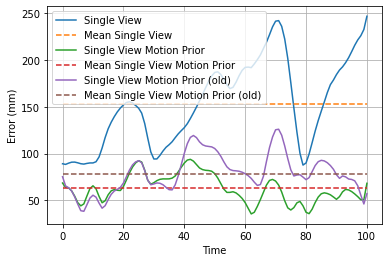

In [50]:
# Run the optimisation
try:
    main_fte.run(root_dir, data_path, cam_idx, start_frame, end_frame, dlc_thresh, out_dir_prefix="/Users/zico/msc/dev/AcinoSet/data")
except:
    logger.error(traceback.format_exc())
    # Stop logging and return print functionality to normal.
    sys.stdout.logfile.close()
    sys.stdout = sys.stdout.terminal

In [ ]:
dummy_scene = "/Users/zico/OneDrive - University of Cape Town/CheetahReconstructionResults/cheetah_videos/2017_08_29/top/extrinsic_calib/6_cam_scene_sba.json"
main_fte.plot_trajectory("/Users/zico/msc/dev/monocular_estimation/data/synthesized.pickle", dummy_scene)

In [ ]:
# Compare the optimisation with previous results i.e. compare the output pickle file fte.pickle. This is a visual inspection.abs
main_fte.plot_cheetah(root_dir, data_path, out_dir_prefix="/Users/zico/msc/dev/AcinoSet/data")

In [ ]:
# Compare the optimisation with previous results i.e. compare the output pickle file fte.pickle. This is a visual inspection.abs
main_fte.compare_cheetahs("/Users/zico/msc/dev/AcinoSet/data/2017_08_29/top/jules/run1_1/fte_1/fte.pickle", root_dir, data_path, fte_type="sd_fte", centered=False, out_dir_prefix="/Users/zico/msc/dev/AcinoSet/data")

In [ ]:
main_fte.compare_traj_error("/Users/zico/msc/dev/AcinoSet/data/2017_08_29/top/jules/run1_1/fte_pw_2/fte.pickle", "/Users/zico/msc/dev/AcinoSet/data/2017_08_29/top/jules/run1_1/fte_1/fte.pickle", root_dir, data_path, out_dir_prefix="/Users/zico/msc/dev/AcinoSet/data")

In [ ]:
eval_dir = os.path.join("/Users/zico/msc/dev/AcinoSet/data", data_path, "fte_pw")
data = data_ops.load_pickle(os.path.join(eval_dir, "fte.pickle"))
results_dir = os.path.join(eval_dir, "evaluation")
os.makedirs(eval_dir, exist_ok=True)
max_delta_acc = evaluate_fte.eval_delta_acc(data, results_dir)
evaluate_fte.eval_model_error(data, results_dir)
evaluate_fte.eval_meas_error(data, results_dir)
logger.info(max_delta_acc)

In [ ]:
fig_fpath = os.path.join(os.path.join(os.path.join("..", "data"), data_path, "fte_pw"), 'fte.svg')
pw_file = data_ops.load_pickle(os.path.join(os.path.join("..", "data"), data_path, "fte_pw", "fte.pickle"))
app.plot_cheetah_states(pw_file["x"], out_fpath=fig_fpath)

In [ ]:
main_fte.plot_cost_functions()